## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## 2. Loading datasets

### 2.1 Load Data

In [2]:
df = pd.read_csv("/Users/sonamchoki/Desktop/MiniPRJ/html files/laptop_price.csv", encoding='ISO-8859–1')
df.head()

laptop_ID Company      Product Inches                    ScreenResolution  \
0          1   Apple  MacBook Pro   13.3  IPS Panel Retina Display 2560x1600   
1          2   Apple  Macbook Air   13.3                            1440x900   
2          3      HP       250 G6   15.6                   Full HD 1920x1080   
3          4   Apple  MacBook Pro   15.4  IPS Panel Retina Display 2880x1800   
4          5   Apple  MacBook Pro   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys Price_euros  
0  Intel Iris Plus Graphics 640  macOS     1339.69  
1        Intel HD Graphics 6000  macOS      898.94  
2         Intel HD Graphics 620  No OS         575  
3            AMD Radeon Pro 455  macOS     2537.45  
4  Intel Iris Plus Graphics 650  macOS      1803.6

### 2.2 Checking null values for all the columns in the dataset

In [3]:
df.isna().sum()

laptop_ID            0
Company              0
Product              1
Inches               0
ScreenResolution    21
Cpu                  0
Ram                  1
Memory               0
Gpu                  4
OpSys                0
Price_euros          0
dtype: int64

### 2.3 Checking datatypes of all the columns

In [4]:
df.dtypes

laptop_ID            int64
Company             object
Product             object
Inches              object
ScreenResolution    object
Cpu                 object
Ram                 object
Memory              object
Gpu                 object
OpSys               object
Price_euros         object
dtype: object

## 2.3 Cleaning Data

In [5]:
df.drop(["laptop_ID"], axis = 1, inplace=True)
df

Company                     Product  Inches  \
0       Apple                 MacBook Pro    13.3   
1       Apple                 Macbook Air    13.3   
2          HP                      250 G6    15.6   
3       Apple                 MacBook Pro    15.4   
4       Apple                 MacBook Pro    13.3   
...       ...                         ...     ...   
1319  Samsung              Galaxy Book Go  13.97"   
1320       HP                HP EliteBook     14"   
1321       HP  Elite Dragonfly G2 3C6B9ES   13.3"   
1322     ASUS    Chromebook CB314-1H-C2KX   14.0"   
1323   Lenovo            IdeaPad Flex 5iÊ     14"   

                        ScreenResolution                         Cpu   Ram  \
0     IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                               1440x900        Intel Core i5 1.8GHz   8GB   
2                      Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3     IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4     IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   
...                                  ...                         ...   ...   
1319                                 NaN                  Snapdragon   4GB   
1320                                 NaN                     68LCO40  16GB   
1321                                 NaN                     Core i7  16GB   
1322                                 NaN                   Celeron N   4GB   
1323                                 NaN                     Core i5   8GB   

                   Memory                           Gpu           OpSys  \
0               128GB SSD  Intel Iris Plus Graphics 640           macOS   
1     128GB Flash Storage        Intel HD Graphics 6000           macOS   
2               256GB SSD         Intel HD Graphics 620           No OS   
3               512GB SSD            AMD Radeon Pro 455           macOS   
4               256GB SSD  Intel Iris Plus Graphics 650           macOS   
...                   ...                           ...             ...   
1319            128GB SSD                    Andreno618      Windows 11   
1320            512GB SSD                    Integriert  Windows 10 Pro   
1321            512GB SSD                    Integriert      Windows 10   
1322                 64GB                    Integriert       Chrome OS   
1323            512GB SSD                    Integriert      Windows 10   

     Price_euros  
0        1339.69  
1         898.94  
2            575  
3        2537.45  
4         1803.6  
...          ...  
1319         440  
1320       1,376  
1321       2,141  
1322         247  
1323         559  

[1324 rows x 10 columns]

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Company             0
Product             0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Price_euros         0
dtype: int64

In [8]:
np.unique(df.Inches)

array(['10.1', '11.3', '11.6', '12', '12.3', '12.5', '13', '13.3', '13.5',
       '13.9', '14', '14.1', '15', '15.4', '15.6', '17', '17.3', '18.4'],
      dtype=object)

In [9]:
np.unique(df.Company)

array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object)

### 2.4 Type conversion

In [10]:
df.dtypes

Company             object
Product             object
Inches              object
ScreenResolution    object
Cpu                 object
Ram                 object
Memory              object
Gpu                 object
OpSys               object
Price_euros         object
dtype: object

In [11]:
df.Inches = df.Inches.str.strip(' " ').astype('float')
df.Ram = df.Ram.str.strip('GB').astype('int')
df.Price_euros = df.Price_euros.astype('float')

In [12]:
df.dtypes

Company              object
Product              object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Price_euros         float64
dtype: object

### 3. Check Outliers

<AxesSubplot:xlabel='Ram'>

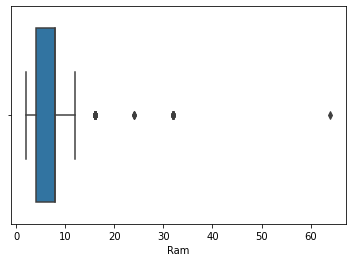

In [13]:
sns.boxplot(x=df['Ram'])

In [14]:
Q1 = df.Ram.quantile(0.25)
Q3 = df.Ram.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [15]:
df[(df.Ram < lowerlimit)  | (df.Ram > upperlimit)]

Company            Product  Inches  \
3      Apple        MacBook Pro    15.4   
6      Apple        MacBook Pro    15.4   
8       Asus    ZenBook UX430UN    14.0   
12     Apple        MacBook Pro    15.4   
17     Apple        MacBook Pro    15.4   
...      ...                ...     ...   
1247    Asus        Rog GL502VS    15.6   
1256    Asus  Rog G752VT-GC073T    17.3   
1271  Lenovo     Yoga 900-13ISK    13.3   
1285  Lenovo     Yoga 900-13ISK    13.3   
1299  Lenovo     Yoga 900-13ISK    13.3   

                                ScreenResolution                          Cpu  \
3             IPS Panel Retina Display 2880x1800         Intel Core i7 2.7GHz   
6             IPS Panel Retina Display 2880x1800         Intel Core i7 2.2GHz   
8                              Full HD 1920x1080   Intel Core i7 8550U 1.8GHz   
12            IPS Panel Retina Display 2880x1800         Intel Core i7 2.8GHz   
17            IPS Panel Retina Display 2880x1800         Intel Core i7 2.9GHz   
...                                          ...                          ...   
1247                 IPS Panel Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz   
1256                 IPS Panel Full HD 1920x1080  Intel Core i7 6700HQ 2.6GHz   
1271  IPS Panel Quad HD+ / Touchscreen 3200x1800   Intel Core i7 6500U 2.5GHz   
1285  IPS Panel Quad HD+ / Touchscreen 3200x1800   Intel Core i7 6500U 2.5GHz   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   Intel Core i7 6500U 2.5GHz   

      Ram                Memory                      Gpu       OpSys  \
3      16             512GB SSD       AMD Radeon Pro 455       macOS   
6      16   256GB Flash Storage  Intel Iris Pro Graphics    Mac OS X   
8      16             512GB SSD     Nvidia GeForce MX150  Windows 10   
12     16             256GB SSD       AMD Radeon Pro 555       macOS   
17     16             512GB SSD       AMD Radeon Pro 560       macOS   
...   ...                   ...                      ...         ...   
1247   16  256GB SSD +  1TB HDD  Nvidia GeForce GTX 1070  Windows 10   
1256   16  128GB SSD +  1TB HDD  Nvidia GeForce GTX 970M  Windows 10   
1271   16             512GB SSD    Intel HD Graphics 520  Windows 10   
1285   16             512GB SSD    Intel HD Graphics 520  Windows 10   
1299   16             512GB SSD    Intel HD Graphics 520  Windows 10   

      Price_euros  
3         2537.45  
6         2139.97  
8         1495.00  
12        2439.97  
17        2858.00  
...           ...  
1247      2325.00  
1256      1900.00  
1271      1499.00  
1285      1499.00  
1299      1499.00  

[221 rows x 10 columns]

In [16]:
df = df[(df.Ram > lowerlimit) & (df.Ram < upperlimit)]
df.shape

(1082, 10)

<AxesSubplot:xlabel='Ram'>

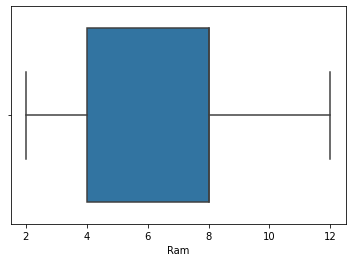

In [17]:
sns.boxplot(x=df['Ram'])

In [18]:
trydf = df

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
categorical=df.select_dtypes(include =['object'])
categorical

Company                                    Product  \
0      Apple                                MacBook Pro   
1      Apple                                Macbook Air   
2         HP                                     250 G6   
4      Apple                                MacBook Pro   
5       Acer                                   Aspire 3   
...      ...                                        ...   
1297    Asus  X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce   
1298  Lenovo                             Yoga 500-14ISK   
1300  Lenovo                         IdeaPad 100S-14IBR   
1301      HP        15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302    Asus        X553SA-XX031T (N3050/4GB/500GB/W10)   

                               ScreenResolution  \
0            IPS Panel Retina Display 2560x1600   
1                                      1440x900   
2                             Full HD 1920x1080   
4            IPS Panel Retina Display 2560x1600   
5                                      1366x768   
...                                         ...   
1297                                   1366x768   
1298  IPS Panel Full HD / Touchscreen 1920x1080   
1300                                   1366x768   
1301                                   1366x768   
1302                                   1366x768   

                                       Cpu               Memory  \
0                     Intel Core i5 2.3GHz            128GB SSD   
1                     Intel Core i5 1.8GHz  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz            256GB SSD   
4                     Intel Core i5 3.1GHz            256GB SSD   
5                  AMD A9-Series 9420 3GHz            500GB HDD   
...                                    ...                  ...   
1297            Intel Core i7 6500U 2.5GHz            500GB HDD   
1298            Intel Core i7 6500U 2.5GHz            128GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz            500GB HDD   

                               Gpu       OpSys  
0     Intel Iris Plus Graphics 640       macOS  
1           Intel HD Graphics 6000       macOS  
2            Intel HD Graphics 620       No OS  
4     Intel Iris Plus Graphics 650       macOS  
5                    AMD Radeon R5  Windows 10  
...                            ...         ...  
1297           Nvidia GeForce 920M  Windows 10  
1298         Intel HD Graphics 520  Windows 10  
1300             Intel HD Graphics  Windows 10  
1301            AMD Radeon R5 M330  Windows 10  
1302             Intel HD Graphics  Windows 10  

[1082 rows x 7 columns]

In [21]:
num =df.select_dtypes(include =['int64', 'float64'])
num

Inches  Ram  Price_euros
0       13.3    8      1339.69
1       13.3    8       898.94
2       15.6    8       575.00
4       13.3    8      1803.60
5       15.6    4       400.00
...      ...  ...          ...
1297    15.6    4       720.32
1298    14.0    4       638.00
1300    14.0    2       229.00
1301    15.6    6       764.00
1302    15.6    4       369.00

[1082 rows x 3 columns]

In [22]:
for i in categorical.columns:
    categorical[i] = le.fit_transform(categorical[i])
categorical

/var/folders/tl/0ldn4j514vdbw164sq6ds4v00000gn/T/ipykernel_72683/2811522750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = le.fit_transform(categorical[i])


Company  Product  ScreenResolution  Cpu  Memory  Gpu  OpSys
0           1      254                23   64       4   52      8
1           1      255                 1   62       2   45      8
2           7       50                 8   73      15   47      4
4           1      254                23   66      15   53      8
5           0       57                 0   14      24   13      5
...       ...      ...               ...  ...     ...  ...    ...
1297        2      482                 0   84      24   57      5
1298       10      491                13   84       4   41      5
1300       10      157                 0   33      30   34      5
1301        7        2                 0   84      10   17      5
1302        2      479                 0   33      24   34      5

[1082 rows x 7 columns]

In [23]:
trydf = pd.concat([categorical, num], axis = 1)
trydf.head()

Company  Product  ScreenResolution  Cpu  Memory  Gpu  OpSys  Inches  Ram  \
0        1      254                23   64       4   52      8    13.3    8   
1        1      255                 1   62       2   45      8    13.3    8   
2        7       50                 8   73      15   47      4    15.6    8   
4        1      254                23   66      15   53      8    13.3    8   
5        0       57                 0   14      24   13      5    15.6    4   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
4      1803.60  
5       400.00

In [24]:
#sc = StandardScaler()
#scf = sc.fit_transform(trydf.iloc[:,:-1])

In [25]:
#newdf = pd.DataFrame(data = scf, columns = trydf.iloc[:,:-1].columns)

In [26]:
#newdf = pd.concat([newdf_fe, trydf[['Price_euros']]], axis=1)
#newdf

In [27]:
#x = newdf.iloc[:,:-1]
#y = newdf.iloc[:,-1]

In [28]:
#from sklearn.model_selection import train_test_split
#xtrain,xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 5)

In [29]:
#lr = LinearRegression()

In [30]:
#lr.fit(xtrain, ytrain)

In [31]:
#lr.score(xtrain, ytrain)

In [32]:
#lr.score(xtest, ytest)

In [33]:
#ypre = lr.predict(xtest)

In [34]:
#mean_squared_error(ytest, ypre)

### 4. EDA - Exploratory Data Analysis

In [35]:
sns.set(rc={"figure.figsize":(9, 5)})

<AxesSubplot:>

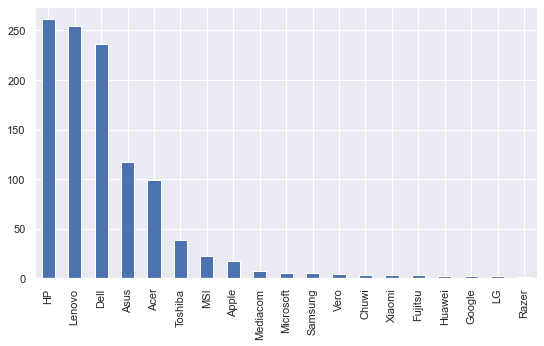

In [36]:
df["Company"].value_counts().plot(kind="bar")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Dell'),
  Text(4, 0, 'Lenovo'),
  Text(5, 0, 'Asus'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'MSI'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Mediacom'),
  Text(14, 0, 'Samsung'),
  Text(15, 0, 'Google'),
  Text(16, 0, 'Fujitsu'),
  Text(17, 0, 'LG'),
  Text(18, 0, 'Razer')])

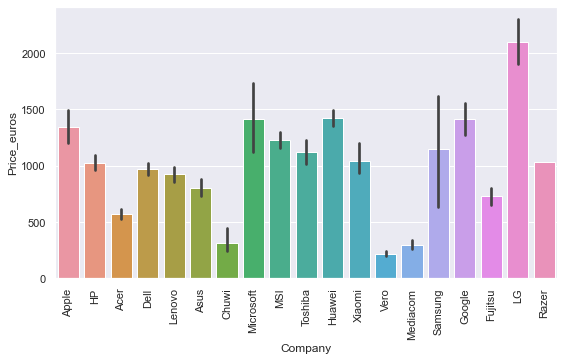

In [37]:
sns.barplot(x=df["Company"], y=df["Price_euros"])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

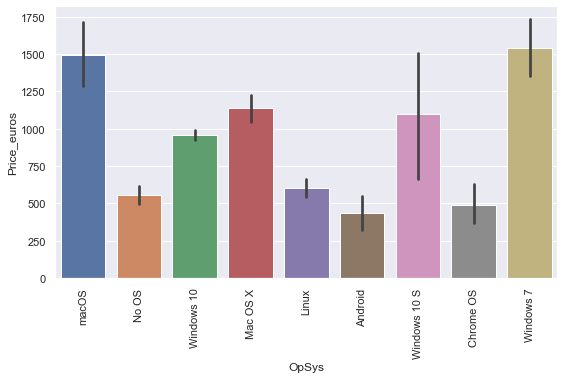

In [38]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

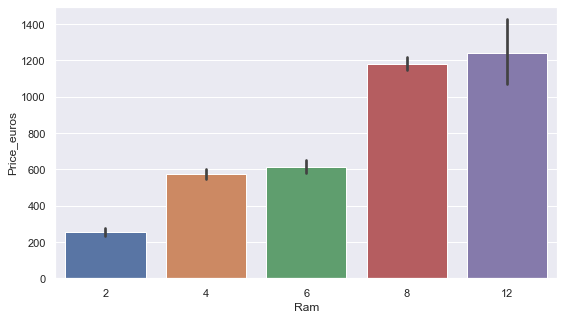

In [39]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])

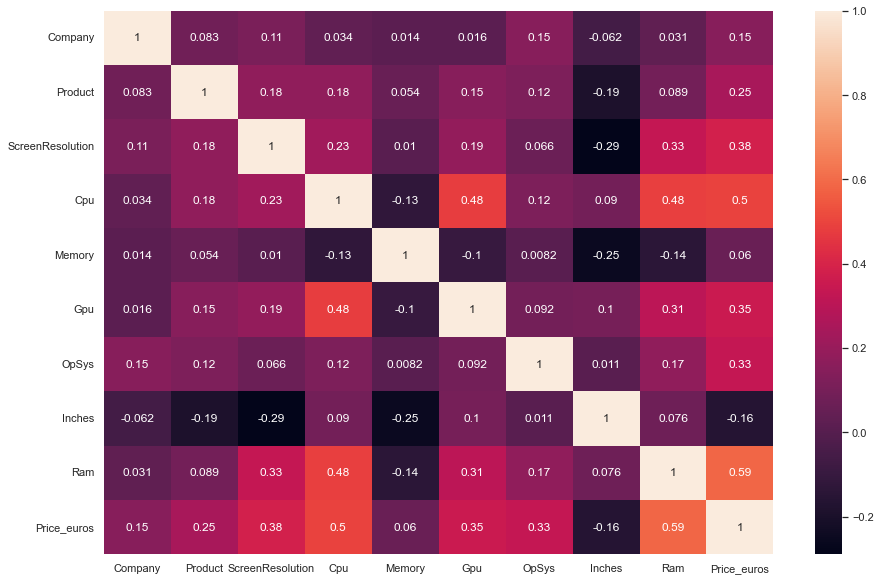

In [40]:
corr = trydf.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show() 

**Result of Analysing Data**


*   Dell, Lenovo and HP are dominant company in Selling Laptops
*   The Average Price of the Laptop in all Brand lies between 1500 to 200 Euros
*   In Operating System Mac is the clear Winner but Windows is also not much Far away
*   Higher the Ram of the laptop, higher the price
*   According to the Analysis the Atribute which makes the most price Difference of the laptops are Gpu, and Ram.

In [41]:
#select_columns = ['Company','ScreenResolution','Cpu','Gpu','OpSys','Ram']
#train_select = df[select_columns]
#train_select.head()

In [42]:
from sklearn.feature_selection import SelectKBest

In [43]:
trydf.head()

Company  Product  ScreenResolution  Cpu  Memory  Gpu  OpSys  Inches  Ram  \
0        1      254                23   64       4   52      8    13.3    8   
1        1      255                 1   62       2   45      8    13.3    8   
2        7       50                 8   73      15   47      4    15.6    8   
4        1      254                23   66      15   53      8    13.3    8   
5        0       57                 0   14      24   13      5    15.6    4   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
4      1803.60  
5       400.00

In [44]:
#Kfs = SelectKBest(k=6)
#Xselected = Kfs.fit_transform(trydf.iloc[:,:-1], trydf.Price_euros)
#Xselected

In [45]:
#findex = np.where(Kfs.get_support())
#findex

In [46]:
#kfeature = [trydf.columns[i] for i in findex][0]

In [47]:
#train_select = trydf[kfeature]
#train_select.head()

 ### 5. Train test split

In [48]:
X = df.iloc[:,:-1]
#X = train_select
y = df.iloc[:,-1]

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

In [51]:
df.dtypes

Company              object
Product              object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Price_euros         float64
dtype: object

In [52]:
df.head()

Company      Product  Inches                    ScreenResolution  \
0   Apple  MacBook Pro    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air    13.3                            1440x900   
2      HP       250 G6    15.6                   Full HD 1920x1080   
4   Apple  MacBook Pro    13.3  IPS Panel Retina Display 2560x1600   
5    Acer     Aspire 3    15.6                            1366x768   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   
5     AMD A9-Series 9420 3GHz    4            500GB HDD   

                            Gpu       OpSys  Price_euros  
0  Intel Iris Plus Graphics 640       macOS      1339.69  
1        Intel HD Graphics 6000       macOS       898.94  
2         Intel HD Graphics 620       No OS       575.00  
4  Intel Iris Plus Graphics 650       macOS      1803.60  
5                 AMD Radeon R5  Windows 10       400.00

In [53]:
n_cols=X.select_dtypes(include =['int64', 'float64']).columns
n_cols

Index(['Inches', 'Ram'], dtype='object')

In [54]:
c_cols=X.select_dtypes(include =['object']).columns
c_cols

Index(['Company', 'Product', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
       'OpSys'],
      dtype='object')

In [55]:
n_index = [X.columns.get_loc(col) for col in n_cols]
n_index

[2, 5]

In [56]:
c_index = [X.columns.get_loc(col) for col in c_cols]
c_index

[0, 1, 3, 4, 6, 7, 8]

### 5.1 Creating pipeline

In [57]:
n_transformer = Pipeline(steps = 
                        [
                            ('scale', StandardScaler())
                        ])

In [58]:
c_transformer = Pipeline(steps =
                        [
                            ('onehot', OneHotEncoder(handle_unknown= 'ignore')),

                        ])

In [59]:
pre = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,n_index),
                           ('category',c_transformer,c_index)
                       ])

## 6. Training the model 

## 6.1 Using Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()
lr

LinearRegression()

In [62]:
from sklearn import set_config
set_config(display='diagram')
mymodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',lr)
                  ])

In [63]:
mymodel.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('est', LinearRegression())])

In [64]:
mymodel.score(xtrain, ytrain)

0.9837301917292918

In [65]:
mymodel.score(xtest, ytest)

0.5884290005585437

In [66]:
ypred = mymodel.predict(xtest)

### 6.1.1 Evaluation of Metrics

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [68]:
mean_squared_error(ytest,ypred)

97202.3987362662

In [69]:
mean_squared_error(ytest,ypred, squared = False)

311.7729923137445

In [70]:
mean_absolute_error(ytest,ypred)

212.3635263721019

In [71]:
r2_score(ytest,ypred)

0.5884290005585437

### 6.2 Using Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rfr =RandomForestRegressor(n_estimators = 6)

In [74]:
from sklearn import set_config
set_config(display='diagram')
rfrmodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',rfr)
                  ])

In [75]:
rfrmodel.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('est', RandomForestRegressor(n_estimators=6))])

In [76]:
rfrmodel.score(xtrain, ytrain)

0.9453898706934762

In [77]:
rfrmodel.score(xtest, ytest)

0.761676412868457

### 6.2.1 Evaluation of Metrics

In [78]:
ypred = rfrmodel.predict(xtest)

In [79]:
mean_squared_error(ytest,ypred)

56285.851957634615

In [80]:
mean_squared_error(ytest,ypred, squared = False)

237.24639503611982

In [81]:
mean_absolute_error(ytest,ypred)

154.3716811965812

In [82]:
r2_score(ytest,ypred)

0.761676412868457

### 6.3 Using Decision Tree Regression

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
dtr = DecisionTreeRegressor()

In [85]:
from sklearn import set_config
set_config(display='diagram')
dtrmodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',dtr)
                  ])

In [86]:
dtrmodel.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('est', DecisionTreeRegressor())])

In [87]:
dtrmodel.score(xtrain, ytrain)

0.9995495825217895

In [88]:
dtrmodel.score(xtest, ytest)

0.7259064958547032

### 6.3.1 Evaluation of Metrics

In [89]:
ypred = dtrmodel.predict(xtest)

In [90]:
mean_squared_error(ytest,ypred)

64733.778903538456

In [91]:
mean_squared_error(ytest,ypred, squared = False)

254.42833746172704

In [92]:
mean_absolute_error(ytest,ypred)

173.1556

In [93]:
r2_score(ytest,ypred)

0.7259064958547032

## 6.4 Using Ridge

In [94]:
from sklearn.linear_model import Ridge

In [95]:
r = Ridge(alpha=3)
r

Ridge(alpha=3)

In [96]:
from sklearn import set_config
set_config(display='diagram')
rmodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',r)
                  ])

In [97]:
rmodel.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('est', Ridge(alpha=3))])

In [98]:
rmodel.score(xtrain, ytrain)

0.8921782167814678

In [99]:
rmodel.score(xtest, ytest)

0.7713197820948394

### 6.4.1 Evaluation of Metrics

In [100]:
ypred = rmodel.predict(xtest)

In [101]:
mean_squared_error(ytest,ypred)

54008.338182427055

In [102]:
mean_squared_error(ytest,ypred, squared = False)

232.39694099197402

In [103]:
mean_absolute_error(ytest,ypred)

170.374081646644

In [104]:
r2_score(ytest,ypred)

0.7713197820948394

### 6.5  Using Lasso

In [105]:
from sklearn.linear_model import Lasso

In [106]:
la = Lasso(alpha=.2)

In [107]:
from sklearn import set_config
set_config(display='diagram')
lamodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',la)
                  ])

In [108]:
lamodel.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('est', Lasso(alpha=0.2))])

In [109]:
lamodel.score(xtrain, ytrain)

0.950991476321167

In [110]:
lamodel.score(xtest, ytest)

0.7874005568543556

### 6.5.1 Evaluation of Metrics

In [111]:
ypred = lamodel.predict(xtest)

In [112]:
mean_squared_error(ytest,ypred)

50210.47613120416

In [113]:
mean_squared_error(ytest,ypred, squared = False)

224.0769424354147

In [114]:
mean_absolute_error(ytest,ypred)

155.6232816412335

In [115]:
r2_score(ytest,ypred)

0.7874005568543556

## 7. Using Polynomial Features

### 7.1 Linear Regression

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
from sklearn import set_config
set_config(display='diagram')
mymodelp2 = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('degree',PolynomialFeatures(degree=2)),
                      ('est',lr)
                  ])

In [118]:
mymodelp2.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('degree', PolynomialFeatures()), ('est', LinearRegression())])

In [119]:
mymodelp2.score(xtrain, ytrain)

0.9995495825217886

In [120]:
mymodelp2.score(xtest, ytest)

0.7808579750799346

In [121]:
ypred = mymodelp2.predict(xtest)

In [122]:
mean_squared_error(ytest,ypred)

51755.664308371546

In [123]:
mean_squared_error(ytest,ypred, squared = False)

227.49871276201003

In [124]:
mean_absolute_error(ytest,ypred)

160.87963237632616

In [125]:
r2_score(ytest,ypred)

0.7808579750799346

### 7.2 Ridge

In [126]:
from sklearn import set_config
set_config(display='diagram')
rmodelp2 = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('degree',PolynomialFeatures(degree=2)),
                      ('est',r)
                  ])

In [127]:
rmodelp2.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('degree', PolynomialFeatures()), ('est', Ridge(alpha=3))])

In [128]:
rmodelp2.score(xtrain, ytrain)

0.9924177494512014

In [129]:
rmodelp2.score(xtest, ytest)

0.8070594669662671

In [130]:
ypred = rmodelp2.predict(xtest)

In [131]:
mean_squared_error(ytest,ypred)

45567.551284672925

In [132]:
mean_squared_error(ytest,ypred, squared = False)

213.46557400356838

In [133]:
mean_absolute_error(ytest,ypred)

154.15721911660344

In [134]:
r2_score(ytest,ypred)

0.8070594669662671

### 7.3 Random Forest Regression

In [135]:
from sklearn import set_config
set_config(display='diagram')
rfrmodelp2 = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('degree',PolynomialFeatures(degree=2)),
                      ('est',rfr)
                  ])

In [136]:
rfrmodelp2.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('degree', PolynomialFeatures()),
                ('est', RandomForestRegressor(n_estimators=6))])

In [137]:
rfrmodelp2.score(xtrain, ytrain)

0.9424515570570107

In [138]:
rfrmodelp2.score(xtest, ytest)

0.7501652939348686

In [139]:
ypred = rfrmodelp2.predict(xtest)

In [140]:
mean_squared_error(ytest,ypred)

59004.4797861301

In [141]:
mean_squared_error(ytest,ypred, squared = False)

242.9083773486005

In [142]:
mean_absolute_error(ytest,ypred)

161.50251794871792

In [143]:
r2_score(ytest,ypred)

0.7501652939348686

### 7.4 Lasso

In [144]:
from sklearn import set_config
set_config(display='diagram')
lamodelp2 = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('degree',PolynomialFeatures(degree=2)),
                      ('est',Lasso(alpha=9))
                  ])

In [145]:
lamodelp2.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('degree', PolynomialFeatures()), ('est', Lasso(alpha=9))])

In [146]:
lamodelp2.score(xtrain, ytrain)

0.6391587295942311

In [147]:
lamodelp2.score(xtest, ytest)

0.6255517272983117

### 7.5  Using Decision Tree Regression

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dtr = DecisionTreeRegressor()

In [150]:
from sklearn import set_config
set_config(display='diagram')
dtrmodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('degree',PolynomialFeatures(degree=2)),
                      ('est',dtr)
                  ])

In [151]:
dtrmodel.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('degree', PolynomialFeatures()),
                ('est', DecisionTreeRegressor())])

In [152]:
dtrmodel.score(xtrain, ytrain)

0.9995495825217895

In [153]:
dtrmodel.score(xtest, ytest)

0.6651489839491354

In [154]:
ypred = dtrmodel.predict(xtest)

In [155]:
mean_squared_error(ytest,ypred)

79083.12787730769

In [156]:
mean_squared_error(ytest,ypred, squared = False)

281.21722542779577

In [157]:
mean_absolute_error(ytest,ypred)

184.41413846153847

In [158]:
r2_score(ytest,ypred)

0.6651489839491354

## 8. Save and Load Model

In [159]:
import pickle
#pickle.dump(rmodelp2, open("laptop.pkl","wb"))

In [160]:
model = pickle.load(open("laptop.pkl","rb"))
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [2, 5]),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 3, 4, 6, 7, 8])])),
                ('degree', PolynomialFeatures()), ('est', Ridge(alpha=3))])